# Split Apply Combine

Often times, we will want to split a dataset based on a key value in a column, and do something within this group, and return this information for each group.  We will often see this referred to as the **split-apply-combine** paradigm.  With Pandas, we will often use the `groupby` method to carry out the splitting piece of this. 

**OBJECTIVES**:

- Use `groupby` to split dataset into groups, and groups within groups
- Apply different methods to `groupby` objects
- Use aggregation methods on `groupby` objects
- Write and use functions of our own on `groupby` objects with `apply`

In [153]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [124]:
df = pd.DataFrame({'street': ['a', 'a', 'b', 'b', 'a'],
                  'agent': ['one', 'one', 'two', 'one', 'two'],
                  'sq_ft': np.random.randint(1000, 4500, 5),
                  'price': np.random.randint(100000, 600000, 5)})

In [127]:
df.head()

,street,agent,sq_ft,price
0,a,one,4071,357440
1,a,one,2749,475167
2,b,two,4404,220114
3,b,one,4337,504668
4,a,two,3662,239005


### `groupby` Basics

To begin, it is important to recognize that the result of using the `groupby` method is a `groupby` object.  This is an object that has simply grouped the data according to our input.  From here, we can select columns like usual and apply basic quantitative methods.  If we wanted to know the average square footage by agent in our mini-data above, we select the column we are concerned with (`df['sq_ft']`), and group this by agent(`.groupby(df['agent'])`).  We are returned an object for which we can then apply the mean to.  Below, we save our grouped data as `grouped`, and can subsequently perform a variety of methods.

In [4]:
df['sq_ft'].groupby(df['agent'])

In [5]:
grouped = df['sq_ft'].groupby(df['agent'])

In [6]:
grouped.head()

0    4218
1    1765
2    2811
3    2821
4    4150
Name: sq_ft, dtype: int64

In [7]:
grouped.mean()

agent
one    2934.666667
two    3480.500000
Name: sq_ft, dtype: float64

In [8]:
grouped.count()

agent
one    3
two    2
Name: sq_ft, dtype: int64

In [9]:
grouped.describe()

,count,mean,std,min,25%,50%,75%,max
agent,,,,,,,,
one,3.0,2934.666667,1230.443958,1765.0,2293.00,2821.0,3519.50,4218.0
two,2.0,3480.500000,946.815980,2811.0,3145.75,3480.5,3815.25,4150.0


We can pass more than one value to group by, and will be returned an object that has two levels of indices.  For example, if we wanted to know:

$$
\textit{What is the average price for each agent by street?}
$$

We will select the price column, group the data by agent and street, and apply the mean method to this.  Notice that there are two levels of indices, *agent* and *street*.  We can return a dataframe that unstacks the levels with the `unstack` method.  

In [10]:
means = df['price'].groupby([df['agent'], df['street']]).mean()

In [11]:
means

agent  street
one    a         380679.5
       b         423775.0
two    a         315470.0
       b         389187.0
Name: price, dtype: float64

In [15]:
df.groupby(['agent','street'])['price'].mean()

agent  street
one    a         380679.5
       b         423775.0
two    a         315470.0
       b         389187.0
Name: price, dtype: float64

In [16]:
means.keys()

MultiIndex(levels=[['one', 'two'], ['a', 'b']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['agent', 'street'])

In [17]:
means.unstack()

street,a,b
agent,,
one,380679.5,423775.0
two,315470.0,389187.0


In [18]:
means[0]

380679.5

In [19]:
means[3]

389187.0

In [20]:
means.shape

(4,)

### Example I 

Using our tips dataset example, we can explore a few straightforward questions using `groupby()`.  

1. What is the average tip by gender?
2. What is the max tip on each day?
3. What is the min tip on each day by time?
4. What is the average bill by party size?

In [22]:
tips = sns.load_dataset('tips')

In [23]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
tips.groupby('sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [25]:
tips.groupby('sex')[['tip']].mean()
#tips.groupby(['sex'])[['tip']].mean()

,tip
sex,
Male,3.089618
Female,2.833448


In [26]:
tips.groupby('day')[['tip']].max()

,tip
day,
Thur,6.70
Fri,4.73
Sat,10.00
Sun,6.50


In [27]:
#tips.groupby(['day', 'time'])['tip'].min().sort_values(ascending = True)
tips.groupby(['size', 'day'])[[ 'tip']].mean().unstack()

tip                              
day     Thur       Fri       Sat       Sun
size                                      
1     1.8300  1.920000  1.000000       NaN
2     2.4425  2.644375  2.517547  2.816923
3     2.6925  3.000000  3.797778  3.120667
4     4.2180  4.730000  4.123846  4.087778
5     5.0000       NaN  3.000000  4.046667
6     5.3000       NaN       NaN  5.000000

In [30]:
tips.groupby(['size', 'day'])[[ 'tip']].mean().unstack()

tip                              
day     Thur       Fri       Sat       Sun
size                                      
1     1.8300  1.920000  1.000000       NaN
2     2.4425  2.644375  2.517547  2.816923
3     2.6925  3.000000  3.797778  3.120667
4     4.2180  4.730000  4.123846  4.087778
5     5.0000       NaN  3.000000  4.046667
6     5.3000       NaN       NaN  5.000000

In [31]:
tips.groupby(['size', 'day'])[[ 'tip']].mean()

tip
size day           
1    Thur  1.830000
     Fri   1.920000
     Sat   1.000000
     Sun        NaN
2    Thur  2.442500
     Fri   2.644375
     Sat   2.517547
     Sun   2.816923
3    Thur  2.692500
     Fri   3.000000
     Sat   3.797778
     Sun   3.120667
4    Thur  4.218000
     Fri   4.730000
     Sat   4.123846
     Sun   4.087778
5    Thur  5.000000
     Fri        NaN
     Sat   3.000000
     Sun   4.046667
6    Thur  5.300000
     Fri        NaN
     Sat        NaN
     Sun   5.000000

Average bill and tip by smoker and time.

In [45]:
x = tips.groupby(['smoker', 'time'])['total_bill', 'tip'].mean()
x.total_bill[0]

17.39913043478261

In [33]:
tips.groupby(['smoker', 'time'])[['total_bill', 'tip']].mean().unstack()

total_bill                  tip          
time        Lunch     Dinner     Lunch    Dinner
smoker                                          
Yes     17.399130  21.859429  2.834348  3.066000
No      17.050889  20.095660  2.673778  3.126887

<IPython.core.display.Javascript object>


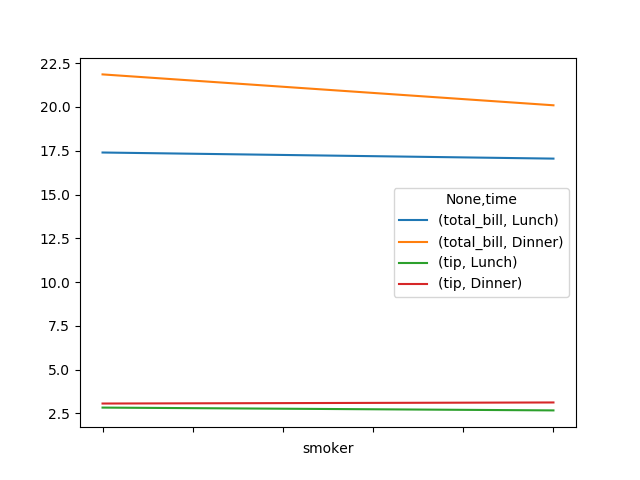

In [53]:
b = tips.groupby(['smoker', 'time'])[['total_bill', 'tip']].mean().unstack()
b.plot()

In [34]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The results of the groupby object are iterable.  For example, if we group the tips data by smoker, we get back the group and the elements of this group.  For multiple indicies of groups, we pass these as tuples.

In [73]:
for name, group in tips.groupby(['smoker']):
    print(name)
    print(group)

Yes
     total_bill   tip     sex smoker   day    time  size
56        38.01  3.00    Male    Yes   Sat  Dinner     4
58        11.24  1.76    Male    Yes   Sat  Dinner     2
60        20.29  3.21    Male    Yes   Sat  Dinner     2
61        13.81  2.00    Male    Yes   Sat  Dinner     2
62        11.02  1.98    Male    Yes   Sat  Dinner     2
63        18.29  3.76    Male    Yes   Sat  Dinner     4
67         3.07  1.00  Female    Yes   Sat  Dinner     1
69        15.01  2.09    Male    Yes   Sat  Dinner     2
72        26.86  3.14  Female    Yes   Sat  Dinner     2
73        25.28  5.00  Female    Yes   Sat  Dinner     2
76        17.92  3.08    Male    Yes   Sat  Dinner     2
80        19.44  3.00    Male    Yes  Thur   Lunch     2
83        32.68  5.00    Male    Yes  Thur   Lunch     2
90        28.97  3.00    Male    Yes   Fri  Dinner     2
92         5.75  1.00  Female    Yes   Fri  Dinner     2
93        16.32  4.30  Female    Yes   Fri  Dinner     2
95        40.17  4.73    Ma

In [72]:
for (n1, n2), group in tips.groupby(['sex', 'smoker']):
    print(n1, n2)
    print(group)

Male Yes
     total_bill    tip   sex smoker   day    time  size
56        38.01   3.00  Male    Yes   Sat  Dinner     4
58        11.24   1.76  Male    Yes   Sat  Dinner     2
60        20.29   3.21  Male    Yes   Sat  Dinner     2
61        13.81   2.00  Male    Yes   Sat  Dinner     2
62        11.02   1.98  Male    Yes   Sat  Dinner     2
63        18.29   3.76  Male    Yes   Sat  Dinner     4
69        15.01   2.09  Male    Yes   Sat  Dinner     2
76        17.92   3.08  Male    Yes   Sat  Dinner     2
80        19.44   3.00  Male    Yes  Thur   Lunch     2
83        32.68   5.00  Male    Yes  Thur   Lunch     2
90        28.97   3.00  Male    Yes   Fri  Dinner     2
95        40.17   4.73  Male    Yes   Fri  Dinner     4
96        27.28   4.00  Male    Yes   Fri  Dinner     2
97        12.03   1.50  Male    Yes   Fri  Dinner     2
98        21.01   3.00  Male    Yes   Fri  Dinner     2
105       15.36   1.64  Male    Yes   Sat  Dinner     2
106       20.49   4.06  Male    Yes   S

In [74]:
#one-liner to create dictionary of groups
pieces = dict(list(tips.groupby('sex')))

In [75]:
pieces['Male'].head()

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


In [76]:
pieces['Female'].head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3


### Data Aggregation

Here, we are interested in using the aggreate function to apply functions that we have developed which return scalar values.  For example, we can write a function that determines the range of tips on a given day.  We are taking all of the values for tips by group, and finding a single value for this.  Similarly, we could do something like investigate the quantiles of each group.

In [131]:
grouped = tips.groupby('day')

In [138]:
grouped.describe()

pct_tip                                                              \
       count      mean       std       min       25%       50%       75%   
day                                                                        
Thur    62.0  0.161276  0.038652  0.072961  0.138210  0.153846  0.192687   
Fri     19.0  0.169913  0.047665  0.103555  0.133739  0.155625  0.196637   
Sat     87.0  0.153152  0.051293  0.035638  0.123863  0.151832  0.188271   
Sun     76.0  0.166897  0.084739  0.059447  0.119982  0.161103  0.187889   

                size            ...       tip        total_bill             \
           max count      mean  ...       75%    max      count       mean   
day                             ...                                          
Thur  0.266312  62.0  2.451613  ...    3.3625   6.70       62.0  17.682742   
Fri   0.263480  19.0  2.105263  ...    3.3650   4.73       19.0  17.151579   
Sat   0.325733  87.0  2.517241  ...    3.3700  10.00       87.0  20.441379   
Sun   0.710345  76.0  2.842105  ...    4.0000   6.50       76.0  21.410000   

                                                      
           std   min      25%    50%      75%    max  
day                                                   
Thur  7.886170  7.51  12.4425  16.20  20.1550  43.11  
Fri   8.302660  5.75  12.0950  15.38  21.7500  40.17  
Sat   9.480419  3.07  13.9050  18.24  24.7400  50.81  
Sun   8.832122  7.25  14.9875  19.63  25.5975  48.17  

[4 rows x 32 columns]

In [62]:
def ranger(df):
    return df.max() - df.min()

In [63]:
grouped.agg(ranger)

,total_bill,tip,size,pct_tip
day,,,,
Thur,35.60,5.45,5,0.193350
Fri,34.42,3.73,3,0.159925
Sat,47.74,9.00,4,0.290095
Sun,40.92,5.49,4,0.650898


In [64]:
grouped.quantile(0.7)

0.7,pct_tip,size,tip,total_bill
day,,,,
Thur,0.181102,2.0,3.000,18.990
Fri,0.192129,2.0,3.150,19.134
Sat,0.181851,3.0,3.164,22.470
Sun,0.180871,3.0,3.695,24.570


In [65]:
grouped.quantile(0.9)['tip']

day
Thur    4.920
Fri     4.060
Sat     4.802
Sun     5.035
Name: tip, dtype: float64

We can add a tip percentage column as follows.

In [66]:
tips['pct_tip'] = tips['tip']/tips['total_bill']

In [67]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [68]:
tips.groupby(['sex', 'smoker'])['pct_tip'].agg('mean')

sex     smoker
Male    Yes       0.152771
        No        0.160669
Female  Yes       0.182150
        No        0.156921
Name: pct_tip, dtype: float64

In [69]:
tips.groupby(['sex', 'smoker'])['pct_tip'].mean()

sex     smoker
Male    Yes       0.152771
        No        0.160669
Female  Yes       0.182150
        No        0.156921
Name: pct_tip, dtype: float64

In [70]:
tips.groupby(['sex', 'smoker'])['pct_tip'].agg(['mean', 'std', ranger])

mean       std    ranger
sex    smoker                              
Male   Yes     0.152771  0.090588  0.674707
       No      0.160669  0.041849  0.220186
Female Yes     0.182150  0.071595  0.360233
       No      0.156921  0.036421  0.195876

In [71]:
tips.groupby(['sex', 'smoker'])['pct_tip'].agg([('Average Tipping Percentage', 'mean'), ('Standard Deviation', 'std'), ('Range', ranger)])

Average Tipping Percentage  Standard Deviation     Range
sex    smoker                                                          
Male   Yes                       0.152771            0.090588  0.674707
       No                        0.160669            0.041849  0.220186
Female Yes                       0.182150            0.071595  0.360233
       No                        0.156921            0.036421  0.195876

In [89]:
funcs = ['mean', 'max', 'min', 'std']

In [90]:
tips.groupby(['sex', 'smoker'])['pct_tip'].agg(funcs)

mean       max       min       std
sex    smoker                                        
Male   Yes     0.152771  0.710345  0.035638  0.090588
       No      0.160669  0.291990  0.071804  0.041849
Female Yes     0.182150  0.416667  0.056433  0.071595
       No      0.156921  0.252672  0.056797  0.036421

In [73]:
#overwrite results with new
#column names
func_named = [('Average', 'mean'), ('Maximum', 'max')]

In [76]:
x2 = tips.groupby(['sex', 'smoker'])['pct_tip'].agg(func_named)

In [78]:
x2.columns

Index(['Average', 'Maximum'], dtype='object')

In [79]:
#pass different aggregation functions
x3 = tips.groupby(['sex', 'smoker']).agg({'tip': np.min, 'pct_tip': np.max})

In [80]:
x3.columns

Index(['tip', 'pct_tip'], dtype='object')

In [81]:
#pass multiple aggregation functions
tips.groupby(['sex', 'smoker']).agg({'tip': [np.min, np.mean], 'pct_tip': np.max})

tip             pct_tip
               amin      mean      amax
sex    smoker                          
Male   Yes     1.00  3.051167  0.710345
       No      1.25  3.113402  0.291990
Female Yes     1.00  2.931515  0.416667
       No      1.00  2.773519  0.252672

In [82]:
#ignore index labels
tips.groupby(['sex', 'smoker'], as_index=False).agg({'tip': [np.min, np.mean], 'pct_tip': np.max})

sex smoker   tip             pct_tip
                  amin      mean      amax
0    Male    Yes  1.00  3.051167  0.710345
1    Male     No  1.25  3.113402  0.291990
2  Female    Yes  1.00  2.931515  0.416667
3  Female     No  1.00  2.773519  0.252672

### Exercise

Using the titanic data, let's use the `groupby` function to provide aggregate information about groups.

1. How many male and female passengers survived and died?
2. How many passengers from each class lived and died?
3. Create a new column that uses the `age` column to create the groups:
  - Children
  - Teenagers
  - Young Adults
  - Middle Aged
  - Older
  - Senior
  
You are free to define these as you see fit.  Further, you should use better and easier labels in your code.  Investigate the survival within each of these groups.

In [154]:
titanic = pd.read_csv('data/eda_data/titanic.csv')

In [157]:
x = titanic['age'].isna() == True

In [162]:
#occ[(occ.occupation == 'librarian' ) & (occ.age < 40)].head()
titanic[(titanic['age'].isna() == True) & (titanic['sex'] == 'male')].head(100)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
36,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
45,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
46,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
48,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C
55,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S


In [141]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [142]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
# How many male and female passengers survived and died?
titanic.groupby(['sex','survived'])[['survived']].count().unstack()

survived     
survived        0    1
sex                   
female         81  233
male          468  109

In [144]:
#2. How many passengers from each class lived and died?
titanic.groupby(['pclass','survived'])[['survived']].count().unstack()

survived     
survived        0    1
pclass                
1              80  136
2              97   87
3             372  119

In [145]:
titanic['age_group'] = pd.cut(titanic.age, [0,12,20,40,60,80,110], labels = ['child', 'teenager', 'grown', 'older', 'senior','elder'])

In [147]:
titanic.head(20)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,grown
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,grown
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,grown
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,grown
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,grown
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,older
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,grown
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,teenager


In [152]:
titanic['age'].notna().describe()

count      891
unique       2
top       True
freq       714
Name: age, dtype: object

In [ ]:
titanic.groupby(['sex', 'survived'])['survived'].count()

In [ ]:
titanic.groupby(['pclass', 'survived'])['survived'].count().unstack()

In [ ]:
age_group = []
for age in titanic.age:
    if age <= 12:
        age_group.append('child')
    elif age < 20:
        age_group.append('teenager')
    elif age < 50:
        age_group.append('mid-age')
    elif age < 70:
        age_group.append('older')
    else:
        age_group.append('old')

In [ ]:
titanic['age_group'] = age_group

In [ ]:
titanic.head()

In [ ]:
titanic.groupby(['age_group', 'survived'])['survived'].count()

In [ ]:
titanic.groupby(['age_group', 'survived'])['survived'].count().unstack()

### `apply`

Beyond aggregation functions, we can apply a more general call to functions that don't necessarily return a scalar value.  For example, suppose we wanted to pass a function that will take the top 5 tip percentages.  Then, we can apply this to different groupings of the data.  Because our function takes a column argument as well as a top number, we can call these using the `apply` method also.

In [92]:
def top(df, n=5, column='pct_tip'):
    return df.sort_values(by = column)[-n:]

In [93]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   pct_tip
smoker                                                                   
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990

In [94]:
tips.groupby(['smoker', 'day']).apply(top, n=2, column = 'total_bill')

total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
Yes    Thur 83        32.68   5.00    Male    Yes  Thur   Lunch     2   
            197       43.11   5.00  Female    Yes  Thur   Lunch     4   
       Fri  90        28.97   3.00    Male    Yes   Fri  Dinner     2   
            95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  102       44.30   2.50  Female    Yes   Sat  Dinner     3   
            170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  184       40.55   3.00    Male    Yes   Sun  Dinner     2   
            182       45.35   3.50    Male    Yes   Sun  Dinner     3   
No     Thur 85        34.83   5.17  Female     No  Thur   Lunch     4   
            142       41.19   5.00    Male     No  Thur   Lunch     5   
       Fri  91        22.49   3.50    Male     No   Fri  Dinner     2   
            94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  59        48.27   6.73    Male     No   Sat  Dinner     4   
            212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  112       38.07   4.00    Male     No   Sun  Dinner     3   
            156       48.17   5.00    Male     No   Sun  Dinner     6   

                  pct_tip  
smoker day                 
Yes    Thur 83   0.152999  
            197  0.115982  
       Fri  90   0.103555  
            95   0.117750  
       Sat  102  0.056433  
            170  0.196812  
       Sun  184  0.073983  
            182  0.077178  
No     Thur 85   0.148435  
            142  0.121389  
       Fri  91   0.155625  
            94   0.142857  
       Sat  59   0.139424  
            212  0.186220  
       Sun  112  0.105070  
            156  0.103799

In [95]:
tips.groupby('smoker', group_keys = False).apply(top)

,total_bill,tip,sex,smoker,day,time,size,pct_tip
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990


In [96]:
tips.groupby('smoker')['pct_tip'].describe(percentiles = [])

,count,mean,std,min,50%,max
smoker,,,,,,
Yes,93.0,0.163196,0.085119,0.035638,0.153846,0.710345
No,151.0,0.159328,0.039910,0.056797,0.155625,0.291990


In [ ]:
tips.groupby('smoker')['pct_tip'].describe(percentiles = []).unstack()

### Example for filling `na`

Suppose we have a dataset that we want to use group specific values as replacements for missing values.  In the example below, it seems we have some missing bidderrate values.  Perhaps we make the assumption that an acceptable replacement would be the average bidder rating for each auction.  To apply this, we first split the data and pass an anonymous `lambda` function that will be applied to each group.  In this case, we are filling the `na` values with the `mean`.

In [97]:
auction = pd.read_csv('data/auction/auction.csv')

In [98]:
auction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 9 columns):
auctionid       10681 non-null int64
bid             10681 non-null float64
bidtime         10681 non-null float64
bidder          10665 non-null object
bidderrate      10670 non-null float64
openbid         10681 non-null float64
price           10681 non-null float64
item            10681 non-null object
auction_type    10681 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 751.1+ KB


In [99]:
auction.bidderrate.describe()

count    10670.000000
mean        31.936739
std        120.594074
min         -4.000000
25%          1.000000
50%          5.000000
75%         21.000000
max       3140.000000
Name: bidderrate, dtype: float64

In [102]:
auction.head(1000)

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.0,177.50,Cartier wristwatch,3 day auction
1,1638893549,100.00,2.600116,chuik,0.0,99.0,177.50,Cartier wristwatch,3 day auction
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.0,177.50,Cartier wristwatch,3 day auction
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.0,177.50,Cartier wristwatch,3 day auction
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.50,Cartier wristwatch,3 day auction
5,1639453840,1.00,0.355856,bfalconb,2.0,1.0,355.00,Cartier wristwatch,3 day auction
6,1639453840,1.25,0.484757,sbord,1.0,1.0,355.00,Cartier wristwatch,3 day auction
7,1639453840,1.50,0.492639,bfalconb,2.0,1.0,355.00,Cartier wristwatch,3 day auction
8,1639453840,25.00,0.494630,sbord,1.0,1.0,355.00,Cartier wristwatch,3 day auction
9,1639453840,2.00,0.511169,bfalconb,2.0,1.0,355.00,Cartier wristwatch,3 day auction


In [107]:
auction.groupby('auctionid').agg(['mean','count']).head(50)

bid         bidtime        bidderrate        openbid  \
                   mean count      mean count        mean count     mean   
auctionid                                                                  
1638843936  1167.857143     7  4.378416     7   38.428571     7   500.00   
1638844284   362.500000     2  1.244913     2   16.500000     2   200.00   
1638844464   554.236250    16  6.225163    16    9.125000    16   300.00   
1638844729   284.545455    11  6.895609    11   29.636364    11   225.00   
1638893549   144.500000     5  2.588555     5    1.600000     5    99.00   
1638917885   135.079231    13  5.224840    13   88.153846    13    25.00   
1639226378  1057.083333    12  3.880852    12   11.000000    12   495.00   
1639253454   252.500000     2  6.025833     2    4.500000     2   250.00   
1639309309   191.575556    27  2.838329    27    8.481481    27     1.00   
1639323228   110.187500     8  1.589288     8   55.750000     8     1.00   
1639333116   301.734167    24  3.794359    24   17.083333    24   155.00   
1639341131   127.403200    25  5.336105    25   33.520000    25     4.99   
1639364679  1122.000000     3  6.455976     3   16.000000     3  1000.00   
1639425502   223.250000     2  0.634832     2  497.500000     2   100.00   
1639453840   149.371212    33  1.686570    33    2.666667    33     1.00   
1639672910  5250.000000     4  6.769317     4    3.500000     4  5000.00   
1639826019  1463.944444    18  4.080986    18   13.500000    18   899.99   
1639929579   908.646471    17  3.030127    17   18.941176    17     1.00   
1639979107    58.531250    16  5.959862    16   30.875000    16     5.00   
1640179146   303.042727    22  3.351665    22   51.863636    22     1.00   
1640257270    28.069231    13  3.832818    13   41.538462    13     9.99   
1640495398  1270.652174    23  3.429644    23    1.695652    23   500.00   
1640550476   138.000000    23  3.666678    23   80.869565    23     1.00   
1640653873   114.366667    15  4.579187    15   29.266667    15    50.00   
1640793161   932.964286    14  3.537889    14   15.142857    14     1.00   
1640809330   233.445000    20  1.991861    20   19.250000    20     1.00   
1640809333   862.739000    40  2.761160    40   17.700000    40     1.00   
1640936328   199.535000    22  4.744389    22   35.681818    22     1.00   
1641062012  1574.663333     3  5.459217     3   79.000000     3  1499.99   
1641112143   758.846154    13  3.499299    13    0.307692    13   500.00   
1641142160   154.804000     5  2.468324     5   12.000000     5    99.00   
1641154540  2387.500000     4  4.991366     4    0.000000     4  2350.00   
1641242797   336.798000     5  3.285917     5  276.000000     5   200.00   
1641457876   367.500000     2  3.941389     2  109.000000     2   195.00   
1641587440   160.622381    21  5.023634    21   16.238095    21     1.00   
1641628327  1766.364286     7  5.608310     7   51.857143     7   500.00   
1641629836   410.142857    14  4.739630    14   35.571429    14   250.00   
1641722275    71.750000    20  5.048055    20   34.950000    20     9.99   
1641783552  1376.562500    16  2.129800    16    0.500000    16     1.00   
1641880134   367.454545    11  6.376843    11   11.909091    11   200.00   
1641880908   382.802500     4  5.023530     4   63.500000     4   175.00   
1641962219   277.359375    16  2.611235    16   56.687500    16    90.00   
1642005995   375.032222    18  2.297054    18   13.722222    18    99.00   
1642185637   402.222222     9  3.688947     9    2.333333     9   299.99   
1642243766   262.546364    11  1.417859    11   40.181818    11    99.99   
1642322610  1749.800000     5  4.670519     5   42.200000     5  1699.00   
1642414724   262.571429    14  2.288700    14   18.571429    14     9.99   
1642421109   165.952727    11  2.990933    11   20.909091    11     9.99   
1642424500    80.142857     7  2.407102     7   32.428571     7     9.99   
1642514892   725.611111     9  3.229559     9   27.888889     9   50

In [ ]:
fill_bidrate = lambda g: g.fillna(g.mean())

In [ ]:
auction_filled = pd.merge(auction, auction.groupby('auctionid').apply(fill_bidrate))

In [ ]:
auction_filled.head()

### Further Reading

- [Pandas `groupby` documentation](https://pandas.pydata.org/pandas-docs/stable/groupby.html)
- [Datacamp Article](https://www.datacamp.com/community/tutorials/pandas-split-apply-combine-groupby)